# FISH - Pipeline - A Python interactive notebook to process FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Notebook summary 


- Load a directory with microscope FISH images
- Establish a connection to Network-attached storage (NAS) using [pysmb](https://github.com/miketeo/pysmb)
- Perform cell segmentation using [Cellpose](https://github.com/MouseLand/cellpose)
- Perform spot detection using [Big-FISH](https://github.com/fish-quant/big-fish)
- Datamanagement using Pandas

----

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

In [3]:
fa.Banner().print_banner()

 
FISH processing repository by : 
Luis U. Aguilera, Joshua Cook, Tim Stasevich, and Brian Munsky. 
 ____________________________________________________________  
|                      ,#^^^^^^^%&&&                         | 
|  .&.                 &.           ,&&&___                  | 
|  &  &         ___&&&/                    (&&&&____         | 
|  &    &,____#&                   .       #.       %&**,    | 
|  /(                  &         ,%       &       %     ,&   | 
|    &          &.                       %.      %&%     &*  | 
|     &&         *         .%            &             &(    | 
|   &                &(           ,#     .%             ,.&  | 
|  &    _&&__#&.     &&           &.      ,&         ,%&     | 
|  &  (%        #&,___                      (-***%&%^        | 
|  & &                %&&&(,.      .*#&&&&&%.                | 
|                          &    ,%%%%                        | 
|___________________________/%%^_____________________________| 



----

# Parameters defined by the user 

----

### Paths to images

In [4]:
# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
path_to_config_file = desktop_path.joinpath('config.yml')
# Path to images and masks
data_folder_path =pathlib.Path('smFISH_images/Eric_smFISH_images/20230306/DUSP1_0nM_Dex_0min_012623')
path_to_masks_dir = None 

### Parameters for segmentation and spot detection

In [5]:
diameter_nucleus=100                         # Approximate nucleus size in pixels
diameter_cytosol=180                         # Approximate cytosol size in pixels
psf_z=350                                    # Theoretical size of the PSF emitted by a [rna] spot in the z plan, in nanometers
psf_yx=160                                   # Theoretical size of the PSF emitted by a [rna] spot in the yx plan, in nanometers
voxel_size_z=500                             # Microscope conversion px to nanometers in the z axis.
voxel_size_yx=160                            # Microscope conversion px to nanometers in the xy axis.
channels_with_nucleus= [2]                   # Channel to pass to python for nucleus segmentation
channels_with_cytosol=[1]                    # Channel to pass to python for cytosol segmentation
channels_with_FISH=[0]                       # Channel to pass to python for spot detection
optimization_segmentation_method='default'   # optimization_segmentation_method = 'default', 'intensity_segmentation' 'z_slice_segmentation', 'gaussian_filter_segmentation' , None
save_all_images=0                            # To save all images for all the z-slices
save_filtered_images = False                 # To save filtered images.
number_of_images_to_process = 5 #None           # Use an integer to process a subset of images. None is used to indicate that all images need to be processed.
minimum_spots_cluster = 4                    # Minimal value used to define a cluster.
threshold_for_spot_detection=None            # To select an specific threshold for spot detection. The default is None, and use automated threshold detection.
show_plots=1                                 # Flag to show plots
send_data_to_NAS=0                           # If data sent back to NAS use 1
download_data_from_NAS=1                     # If data downloaded from NAS use 1
remove_z_slices_borders=0                    # Use this flag to remove 2 z-slices from the top and bottom of the stack. This is needed to remove z-slices that are out of focus.
save_pdf_report=False


## Downloading data from NAS

In [6]:
%%capture
# Download data from NAS
convert_to_standard_format = False
if convert_to_standard_format == False:
    local_data_dir, masks_dir, _, _, _,list_images = fa.Utilities().read_images_from_folder( path_to_config_file, data_folder_path, path_to_masks_dir,  download_data_from_NAS)
    number_color_channels = list_images[0].shape[-1]
else:
    ####################################################################
    #### Parameters to reformat images from the terminator scope ####
    number_color_channels = 0                    # Only use if it is needed to convert to standard format
    number_of_fov = 0                            # Only use if it is needed to convert to standard format     
    ####################################################################
    local_data_dir, masks_dir, _, _, _= fa.Utilities().convert_to_standard_format(data_folder_path=data_folder_path, 
                                                                                path_to_config_file=path_to_config_file, 
                                                                                download_data_from_NAS = download_data_from_NAS,
                                                                                number_color_channels=number_color_channels)

## Running the pipeline

----


 Output folder name :  DUSP1_0nM_Dex_0min_012623___nuc_100__cyto_180__psfz_350__psfyx_160__ts_278

 ###################### 
        IMAGE : 0
 ###################### 
    Image Name :   ROI001_XY1678130386_Z00_T0_merged.tif


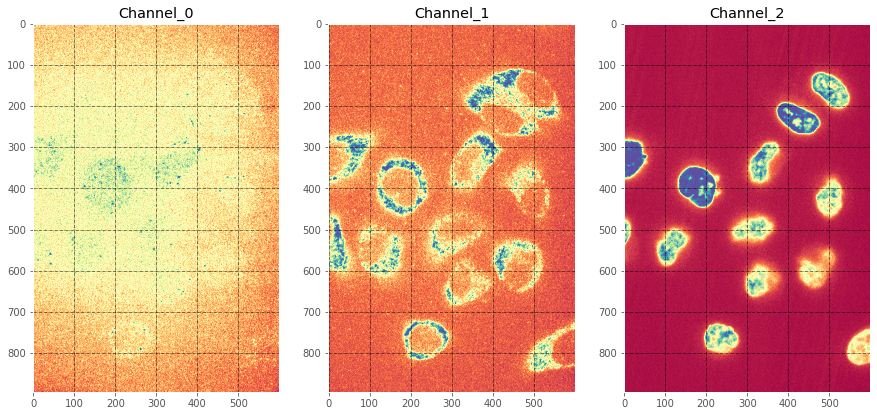

    Original Image Shape :                    [27, 896, 600, 3]
    Image sharpness metric :                  1.124
    Number of detected cells:                 12


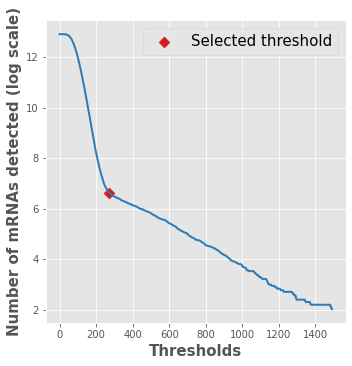

Z-Slice:  13


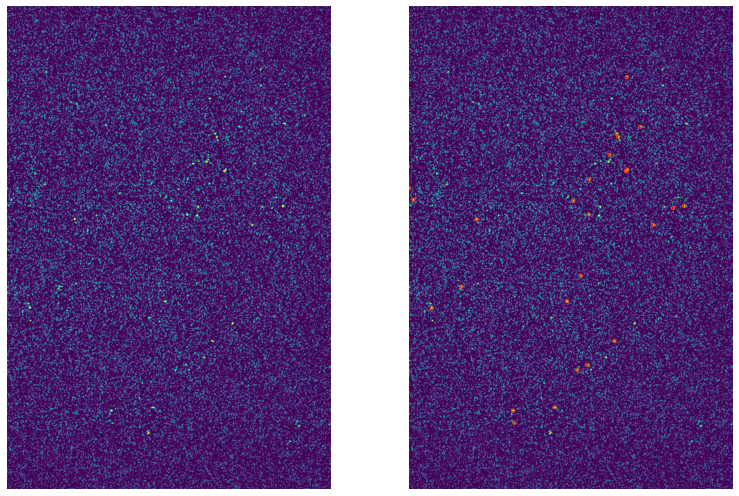

    Intensity threshold for spot detection :  [278]
    Average detected spots per cell :         [57]
    Maximum detected spots per cell :         [134]


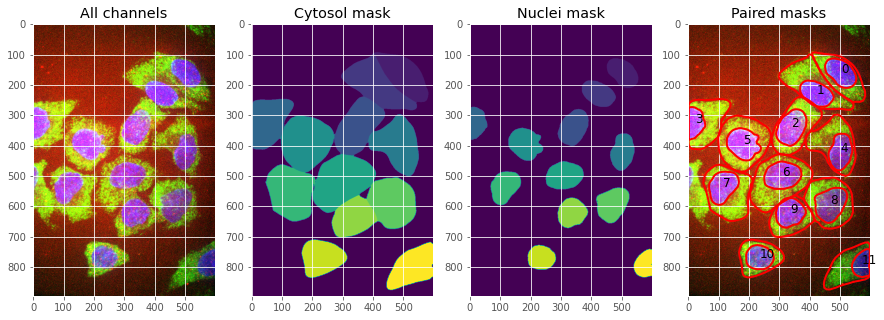


 ###################### 
        IMAGE : 1
 ###################### 
    Image Name :   ROI002_XY1678130387_Z00_T0_merged.tif


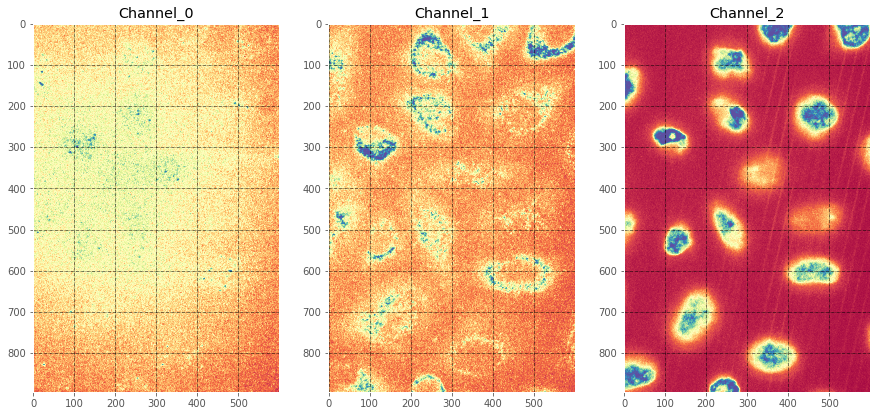

    Original Image Shape :                    [27, 896, 600, 3]
    Image sharpness metric :                  1.125
    Number of detected cells:                 16


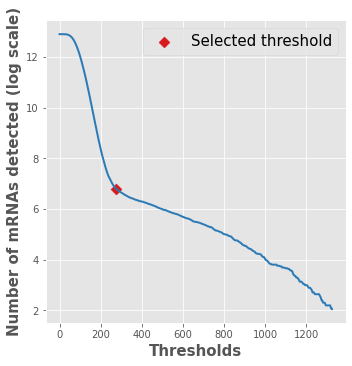

Z-Slice:  13


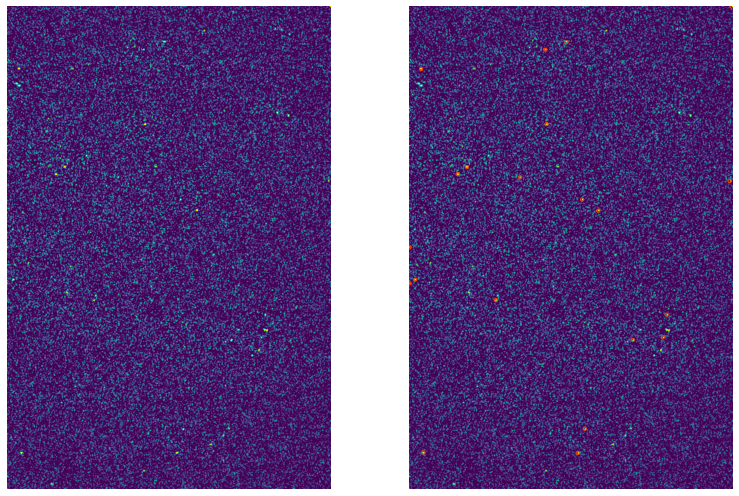

    Intensity threshold for spot detection :  [278]
    Average detected spots per cell :         [53]
    Maximum detected spots per cell :         [85]


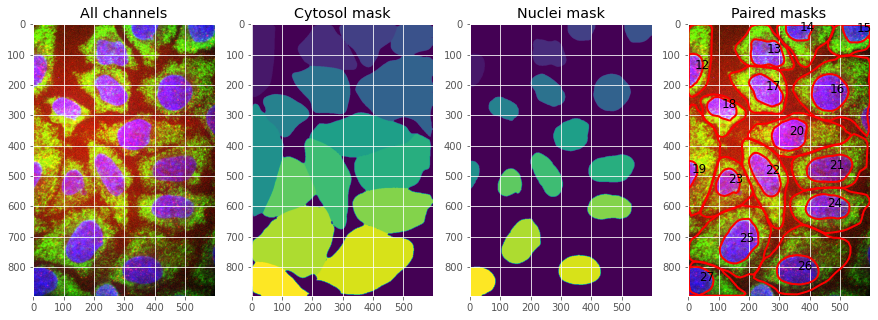


 ###################### 
        IMAGE : 2
 ###################### 
    Image Name :   ROI003_XY1678130388_Z00_T0_merged.tif


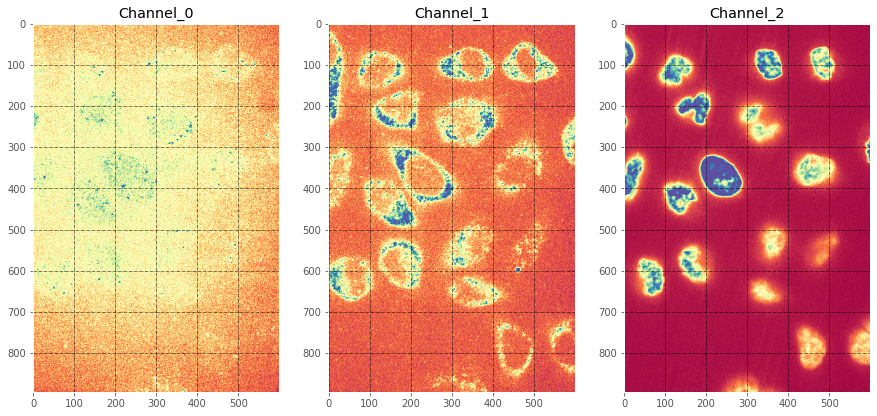

    Original Image Shape :                    [27, 896, 600, 3]
    Image sharpness metric :                  1.127
    Number of detected cells:                 17


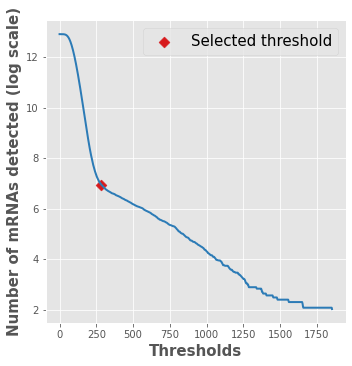

Z-Slice:  13


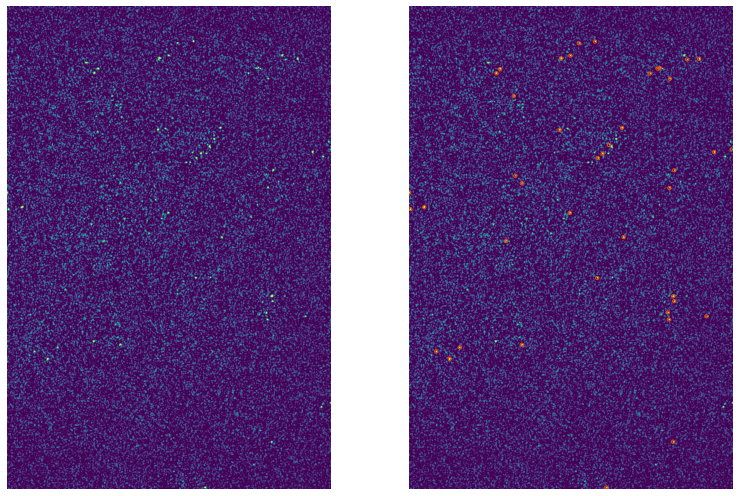

    Intensity threshold for spot detection :  [278]
    Average detected spots per cell :         [59]
    Maximum detected spots per cell :         [127]


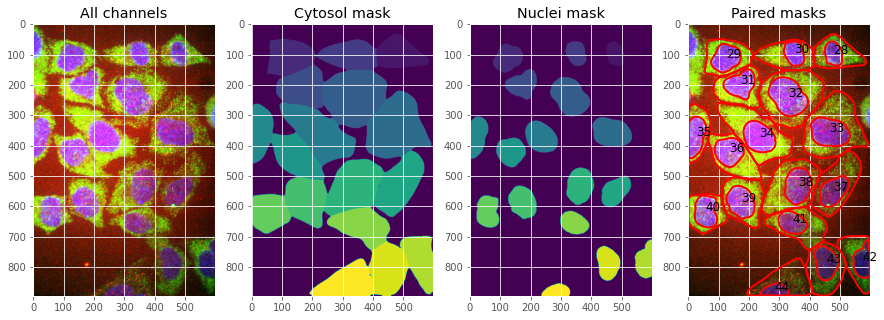


 ###################### 
        IMAGE : 3
 ###################### 
    Image Name :   ROI004_XY1678130389_Z00_T0_merged.tif


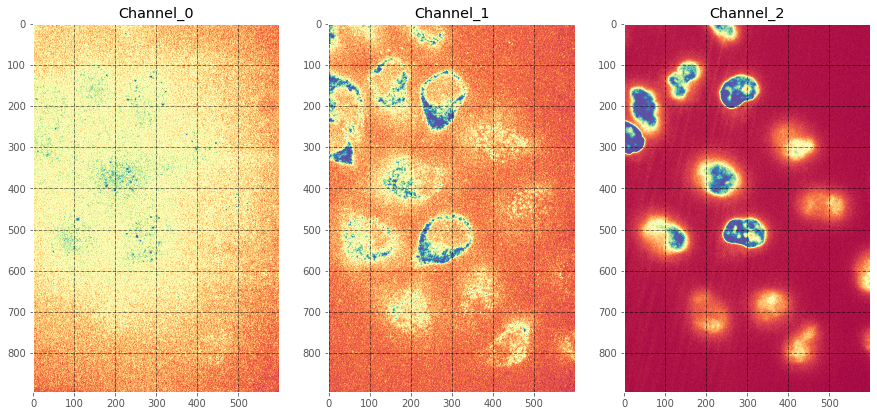

    Original Image Shape :                    [27, 896, 600, 3]
    Image sharpness metric :                  1.127
    Number of detected cells:                 13


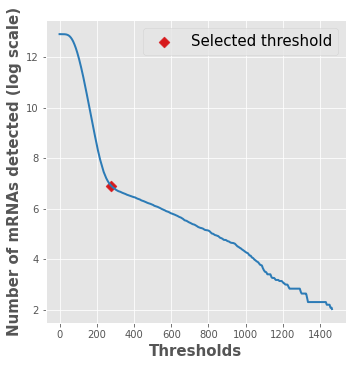

Z-Slice:  13


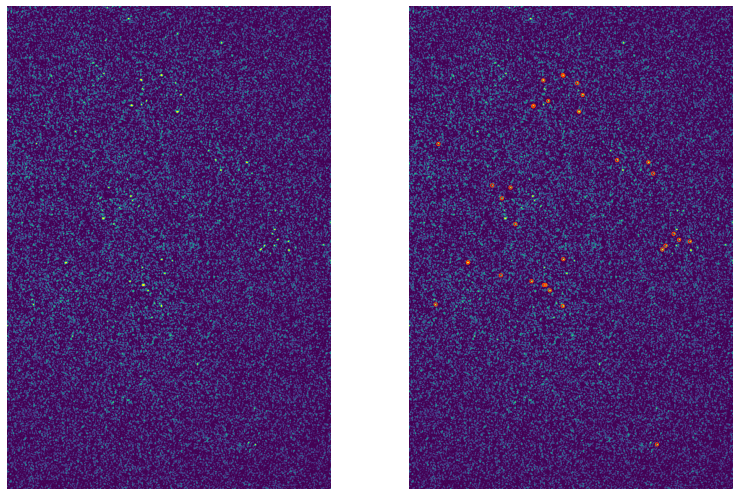

    Intensity threshold for spot detection :  [278]
    Average detected spots per cell :         [72]
    Maximum detected spots per cell :         [125]


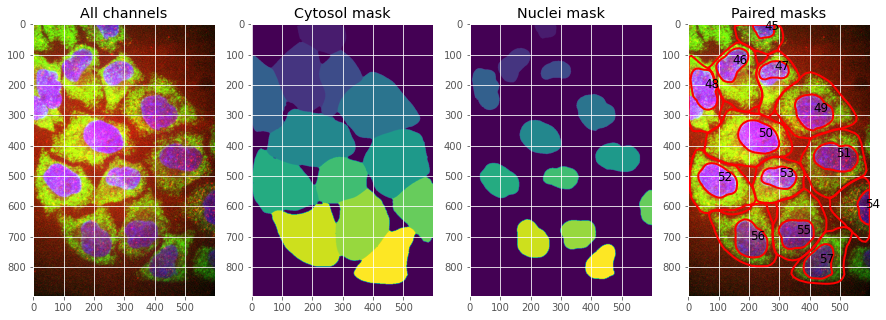


 ###################### 
        IMAGE : 4
 ###################### 
    Image Name :   ROI005_XY1678130390_Z00_T0_merged.tif


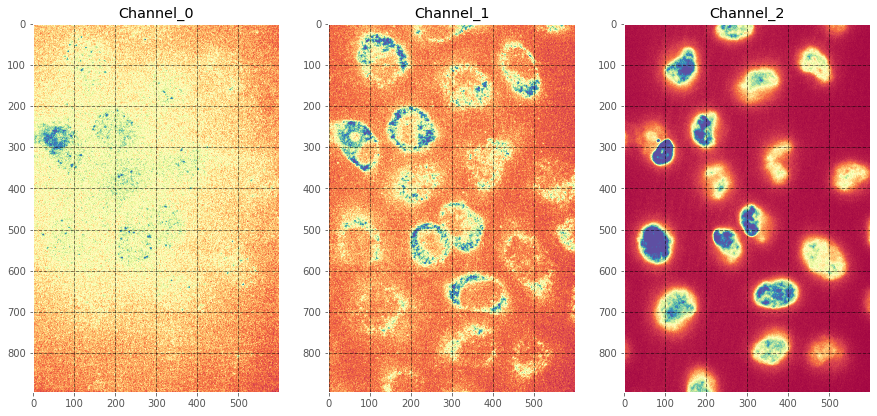

    Original Image Shape :                    [27, 896, 600, 3]
    Image sharpness metric :                  1.127
    Number of detected cells:                 15


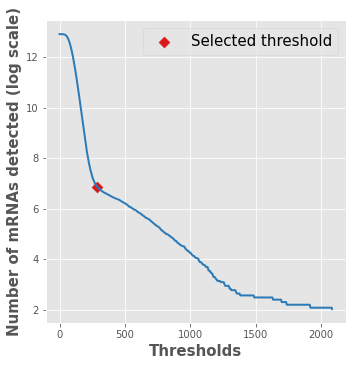

Z-Slice:  13


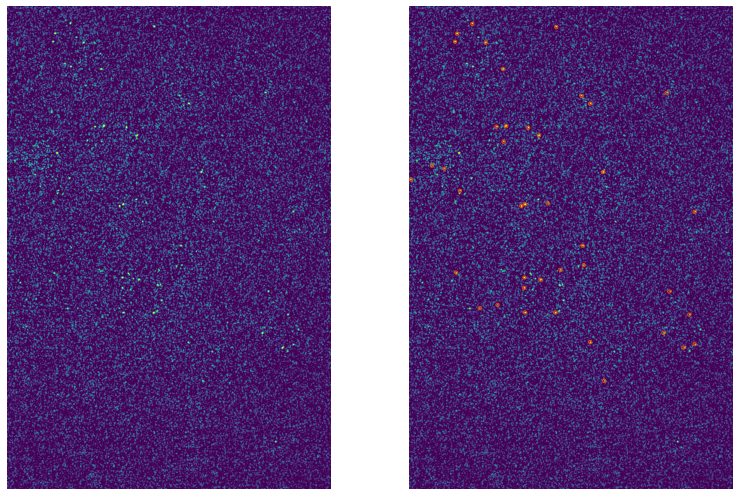

    Intensity threshold for spot detection :  [278]
    Average detected spots per cell :         [47]
    Maximum detected spots per cell :         [133]


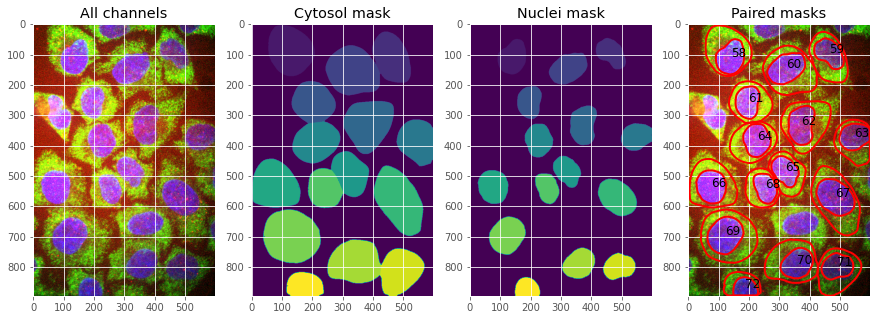

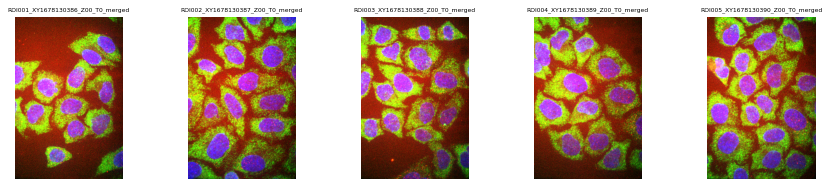

In [7]:
dataframe_FISH,_,_,_,output_identification_string = fa.PipelineFISH(local_data_dir, channels_with_cytosol, channels_with_nucleus, channels_with_FISH,diameter_nucleus, 
                                       diameter_cytosol, minimum_spots_cluster, masks_dir=masks_dir,  voxel_size_z=voxel_size_z,
                                       voxel_size_yx=voxel_size_yx ,psf_z=psf_z,psf_yx=psf_yx, show_plots=show_plots,  
                                       file_name_str=data_folder_path.name, 
                                       optimization_segmentation_method=optimization_segmentation_method,
                                       save_all_images=save_all_images,
                                       threshold_for_spot_detection=threshold_for_spot_detection,
                                       save_filtered_images=save_filtered_images,
                                       number_of_images_to_process=number_of_images_to_process,
                                       remove_z_slices_borders=remove_z_slices_borders,
                                       save_pdf_report=save_pdf_report).run()

## Extracting data from the dataframe

----

In [8]:
# Be aware that the code keeps track of cells without spots. In the data frame, the fields for cells without spots are populated with -1 values.
dataframe_FISH.head()

image_id  cell_id  spot_id  nuc_loc_y  nuc_loc_x  cyto_loc_y  cyto_loc_x  \
0         0        0        0        160        503         170         504   
1         0        0        1        160        503         170         504   
2         0        0        2        160        503         170         504   
3         0        0        3        160        503         170         504   
4         0        0        4        160        503         170         504   

   nuc_area_px  cyto_area_px  cell_area_px  ...  pseudo_cyto_int_ch_2  \
0         7130          9219         16176  ...              948.4367   
1         7130          9219         16176  ...              948.4367   
2         7130          9219         16176  ...              948.4367   
3         7130          9219         16176  ...              948.4367   
4         7130          9219         16176  ...              948.4367   

   nuc_cyto_int_ratio_ch_0  nuc_cyto_int_ratio_ch_1  nuc_cyto_int_ratio_ch_2  \
0                 1.005069                 0.879447                 1.642901   
1                 1.005069                 0.879447                 1.642901   
2                 1.005069                 0.879447                 1.642901   
3                 1.005069                 0.879447                 1.642901   
4                 1.005069                 0.879447                 1.642901   

   nuc_pseudo_cyto_int_ratio_ch_0  nuc_pseudo_cyto_int_ratio_ch_1  \
0                        1.013348                        0.843757   
1                        1.013348                        0.843757   
2                        1.013348                        0.843757   
3                        1.013348                        0.843757   
4                        1.013348                        0.843757   

   nuc_pseudo_cyto_int_ratio_ch_2  spot_int_ch_0 spot_int_ch_1 spot_int_ch_2  
0                        2.827301       644.0667         150.8      -75.6667  
1                        2.827301          340.0       26.5333      538.7333  
2                        2.827301       433.9333         -27.4      -75.5333  
3                        2.827301          363.6      -60.9333         362.2  
4                        2.827301       407.9333        -124.0      347.8667  

[5 rows x 36 columns]

## Plots

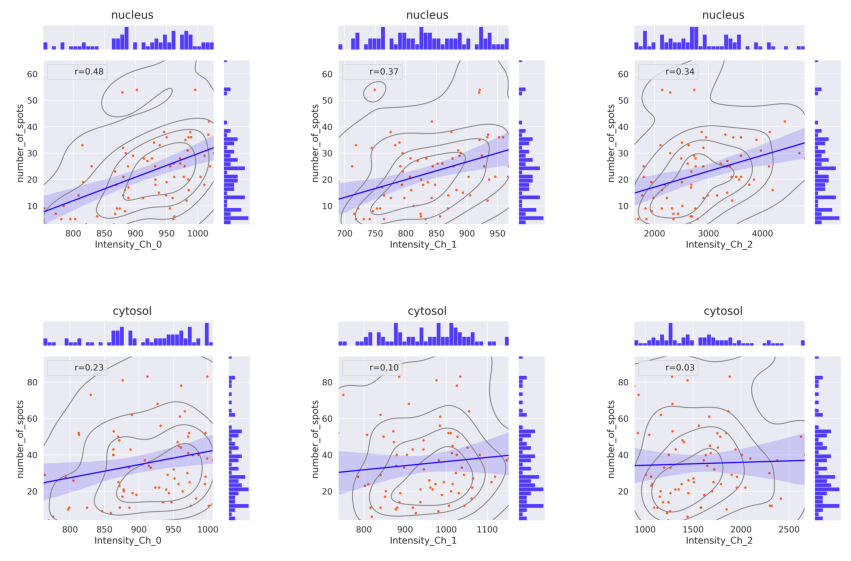

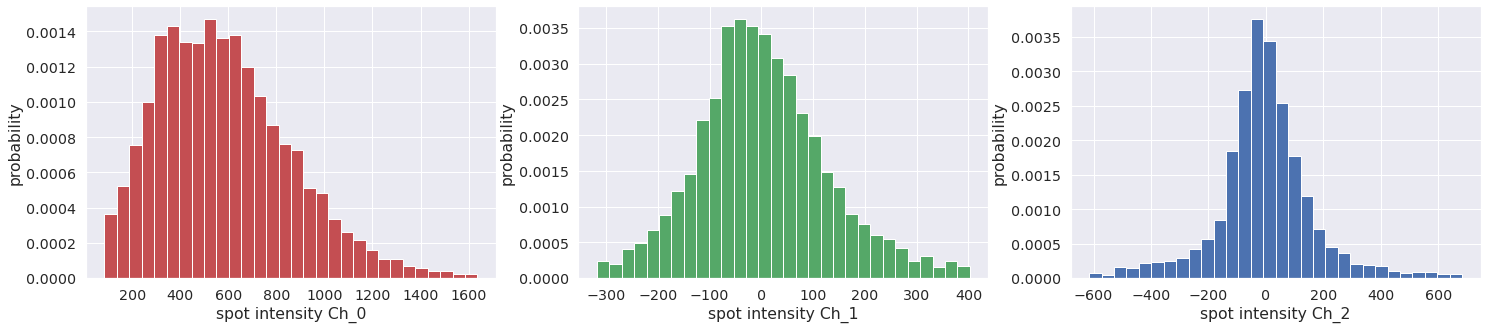

<Figure size 432x288 with 0 Axes>

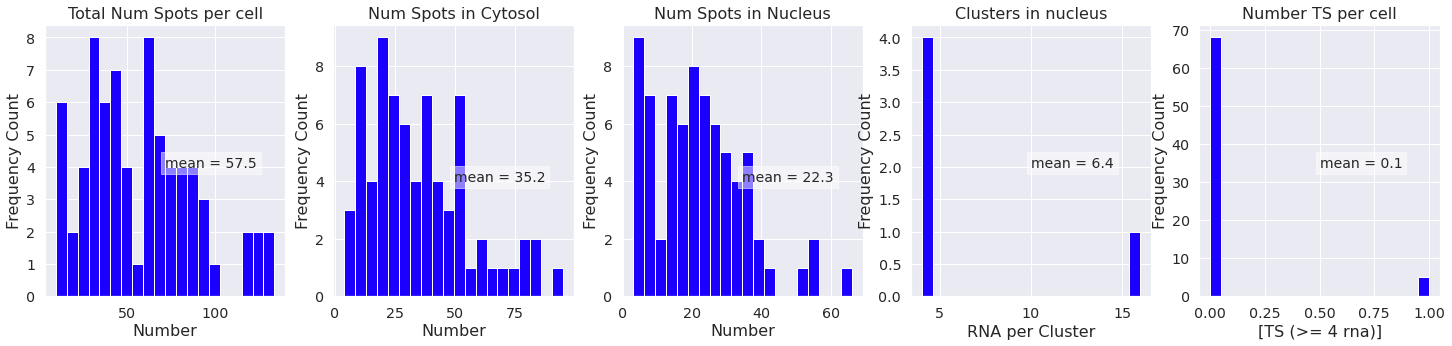

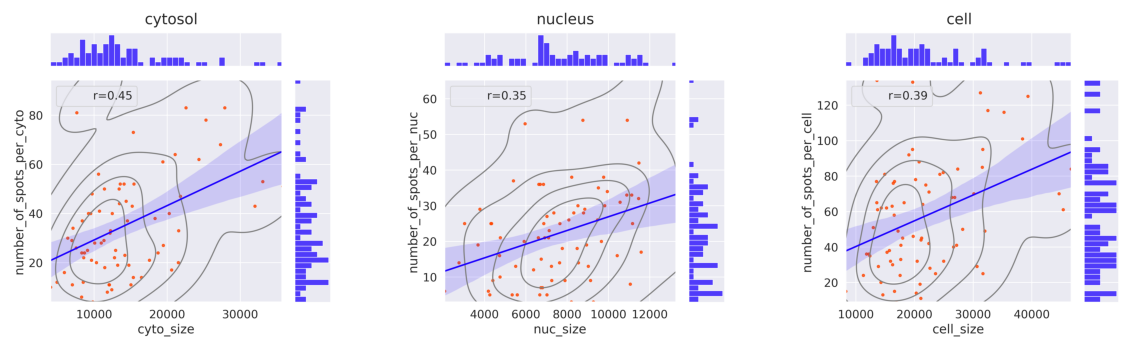

In [9]:
list_files_distributions = fa.Plots().plot_all_distributions(dataframe_FISH,channels_with_cytosol, channels_with_nucleus,channels_with_FISH,minimum_spots_cluster,output_identification_string )

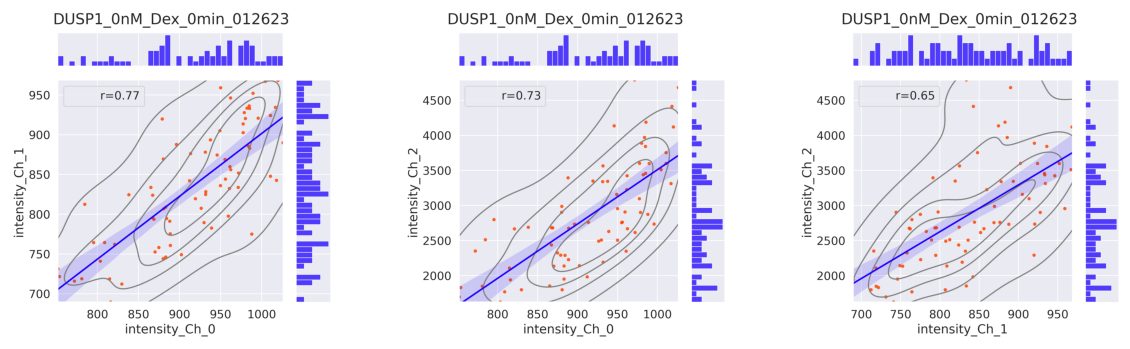

In [10]:
file_plots_bleed_thru = fa.Plots().plot_scatter_bleed_thru(dataframe_FISH, channels_with_cytosol, channels_with_nucleus,output_identification_string)

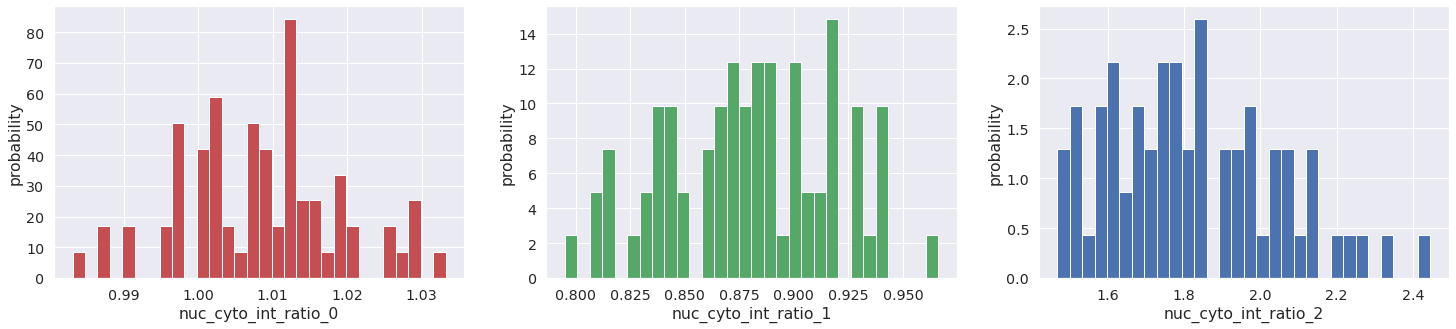

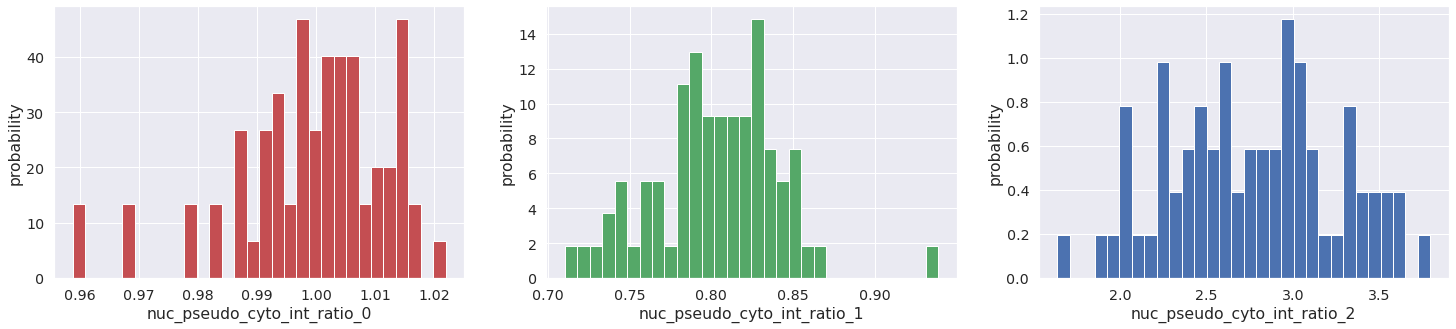

In [11]:
# plots for cytosol nucleus intensity ratios
if not fa.Utilities().is_None(channels_with_cytosol):
    file_plots_int_ratio = fa.Plots().plot_nuc_cyto_int_ratio_distributions(dataframe_FISH,output_identification_string=None,plot_for_pseudo_cytosol=False)
else:
    file_plots_int_ratio = None
file_plots_int_pseudo_ratio = fa.Plots().plot_nuc_cyto_int_ratio_distributions(dataframe_FISH,output_identification_string=None,plot_for_pseudo_cytosol=True)


## Saving data

In [12]:
# Saving data and plots, and sending data to NAS
fa.Utilities().save_output_to_folder(output_identification_string, data_folder_path, 
                                   list_files_distributions=list_files_distributions,
                                   file_plots_bleed_thru=file_plots_bleed_thru,
                                   file_plots_int_ratio=file_plots_int_ratio,
                                   file_plots_int_pseudo_ratio=file_plots_int_pseudo_ratio,
                                   channels_with_FISH=channels_with_FISH,save_pdf_report=save_pdf_report)

# sending data to NAS
analysis_folder_name, mask_dir_complete_name = fa.Utilities().sending_data_to_NAS(output_identification_string, data_folder_path, path_to_config_file, path_to_masks_dir, diameter_nucleus, diameter_cytosol, send_data_to_NAS, masks_dir)

# Moving the complete analysis folder to final analyses folder 
fa.Utilities().move_results_to_analyses_folder( output_identification_string, data_folder_path, mask_dir_complete_name, path_to_masks_dir, save_filtered_images, download_data_from_NAS )

In [13]:
# Calculating ts intensity

dataframe = dataframe_FISH.copy()
dataframe.columns

Index(['image_id', 'cell_id', 'spot_id', 'nuc_loc_y', 'nuc_loc_x',
       'cyto_loc_y', 'cyto_loc_x', 'nuc_area_px', 'cyto_area_px',
       'cell_area_px', 'z', 'y', 'x', 'is_nuc', 'is_cluster', 'cluster_size',
       'spot_type', 'is_cell_fragmented', 'nuc_int_ch_0', 'nuc_int_ch_1',
       'nuc_int_ch_2', 'cyto_int_ch_0', 'cyto_int_ch_1', 'cyto_int_ch_2',
       'pseudo_cyto_int_ch_0', 'pseudo_cyto_int_ch_1', 'pseudo_cyto_int_ch_2',
       'nuc_cyto_int_ratio_ch_0', 'nuc_cyto_int_ratio_ch_1',
       'nuc_cyto_int_ratio_ch_2', 'nuc_pseudo_cyto_int_ratio_ch_0',
       'nuc_pseudo_cyto_int_ratio_ch_1', 'nuc_pseudo_cyto_int_ratio_ch_2',
       'spot_int_ch_0', 'spot_int_ch_1', 'spot_int_ch_2'],
      dtype='object')

In [14]:
dataframe.head()

image_id  cell_id  spot_id  nuc_loc_y  nuc_loc_x  cyto_loc_y  cyto_loc_x  \
0         0        0        0        160        503         170         504   
1         0        0        1        160        503         170         504   
2         0        0        2        160        503         170         504   
3         0        0        3        160        503         170         504   
4         0        0        4        160        503         170         504   

   nuc_area_px  cyto_area_px  cell_area_px  ...  pseudo_cyto_int_ch_2  \
0         7130          9219         16176  ...              948.4367   
1         7130          9219         16176  ...              948.4367   
2         7130          9219         16176  ...              948.4367   
3         7130          9219         16176  ...              948.4367   
4         7130          9219         16176  ...              948.4367   

   nuc_cyto_int_ratio_ch_0  nuc_cyto_int_ratio_ch_1  nuc_cyto_int_ratio_ch_2  \
0                 1.005069                 0.879447                 1.642901   
1                 1.005069                 0.879447                 1.642901   
2                 1.005069                 0.879447                 1.642901   
3                 1.005069                 0.879447                 1.642901   
4                 1.005069                 0.879447                 1.642901   

   nuc_pseudo_cyto_int_ratio_ch_0  nuc_pseudo_cyto_int_ratio_ch_1  \
0                        1.013348                        0.843757   
1                        1.013348                        0.843757   
2                        1.013348                        0.843757   
3                        1.013348                        0.843757   
4                        1.013348                        0.843757   

   nuc_pseudo_cyto_int_ratio_ch_2  spot_int_ch_0 spot_int_ch_1 spot_int_ch_2  
0                        2.827301       644.0667         150.8      -75.6667  
1                        2.827301          340.0       26.5333      538.7333  
2                        2.827301       433.9333         -27.4      -75.5333  
3                        2.827301          363.6      -60.9333         362.2  
4                        2.827301       407.9333        -124.0      347.8667  

[5 rows x 36 columns]

In [15]:
dataframe.loc[ (dataframe['is_cluster']==1) ]

image_id  cell_id  spot_id  nuc_loc_y  nuc_loc_x  cyto_loc_y  \
1614         2       29        0        111        124         108   
2269         2       39        0        586        173         579   
3685         4       61        0        256        196         257   
3747         4       62        0        332        373         329   
3812         4       64        0        382        226         388   

      cyto_loc_x  nuc_area_px  cyto_area_px  cell_area_px  ...  \
1614         126         6741          8564         15305  ...   
2269         182         7647         10324         17971  ...   
3685         204         6866          8373         15239  ...   
3747         387         9023         12185         21208  ...   
3812         213         7762          8496         16258  ...   

      pseudo_cyto_int_ch_2  nuc_cyto_int_ratio_ch_0  nuc_cyto_int_ratio_ch_1  \
1614             988.05912                 1.008996                 0.840044   
2269             940.30781                 1.015927                 0.916832   
3685            1170.35052                 1.012114                 0.844239   
3747            1239.75145                 1.009503                 0.843728   
3812            1510.71235                 1.009298                 0.811665   

      nuc_cyto_int_ratio_ch_2  nuc_pseudo_cyto_int_ratio_ch_0  \
1614                 1.710553                        1.007428   
2269                 1.709625                        1.014583   
3685                 1.733694                        1.011571   
3747                 1.689767                        1.004724   
3812                 1.632291                        1.015455   

      nuc_pseudo_cyto_int_ratio_ch_1  nuc_pseudo_cyto_int_ratio_ch_2  \
1614                        0.710518                        3.384493   
2269                        0.781337                        3.084728   
3685                        0.737211                        3.519665   
3747                        0.802629                        2.344448   
3812                        0.735786                        2.485174   

      spot_int_ch_0 spot_int_ch_1 spot_int_ch_2  
1614     15077.9697     -628.1818    -2239.1212  
2269     11633.8182      104.5455     1493.5455  
3685     134846.181     -335.1238      366.8571  
3747     15984.2727     -158.4242     -918.5152  
3812      8222.4848       29.1515     5724.7576  

[5 rows x 36 columns]

In [16]:
# Extracting TS intensity. for all cells

number_cells = dataframe['cell_id'].nunique()

minimum_spots_cluster = 2

ts_size =  dataframe.loc[ (dataframe['is_cluster']==True) & (dataframe['is_nuc']==True) &  (dataframe['cluster_size']>=minimum_spots_cluster)  & (dataframe['is_cell_fragmented']!=-1)   ].cluster_size.values

ts_size

array([ 4,  4, 16,  4,  4])

In [17]:
#list_ts = sorted(dataframe.loc[ (dataframe['cell_id']==df_index) & (dataframe['is_cluster']==True) &   (dataframe['cluster_size']>=minimum_spots_cluster)  ].cluster_size.values, reverse=True)
#min_length = min(len(ts_array), len(list_ts))
#ts_array[:min_length] = list_ts[:min_length]
# Size of the nucleus of each cell
#nuc_area = dataframe.loc[   (dataframe['cell_id']==df_index) ].nuc_area_px.values[0]   